In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.load_csv import load_csv

In [2]:
df_posicoes = load_csv('df_posicoes_dagster.csv')

In [3]:
len(df_posicoes)

12842

In [4]:
pd.set_option('display.max_columns', None)

df_posicoes.head()

,codigo_onibus,codigo_linha,nome_linha,letreiro,distancia_percorrida,hora_requisicao,x,y,hora_gps,ponto_final,hora_final,segundos_deslocamento,geometry,modelo,tem_ar,tecnologia,sem_ar_l_km,sem_ar_kg_km,com_ar_l_km,com_ar_kg_km,emissao_co2,dia
0,64460,1275,502J-10,METRÔ STA. CRUZ - EST. AUTÓDROMO,551676.457829,01:05:00,-46.664956,-23.651473,2025-10-16 07:51:59-03:00,POINT (327897.309123536 7377273.983900921),2025-10-16 07:51:59-03:00,78863.0,POINT (330186.275525424 7383369.34632951),Básico,True,Básico,0.46,0.386,0.53,0.445,780.969744,dia 1
1,68142,1114,5010-10,STO. AMARO - JABAQUARA,800797.130440,04:39:00,-46.637890,-23.665543,2025-10-16 15:08:23-03:00,POINT (333649.73408162367 7382168.18370829),2025-10-16 15:08:23-03:00,127804.0,POINT (332965.21254755673 7381843.143067529),Miniônibus,False,Miniônibus,0.30,0.252,0.35,0.294,641.678741,dia 1
2,68561,1131,546A-10,STO. AMARO - JD. APURÁ,292026.979699,05:34:00,-46.652948,-23.706168,2025-10-16 19:44:53-03:00,POINT (328605.302180435 7379399.982717363),2025-10-16 19:44:53-03:00,62246.0,POINT (331481.48688482423 7377326.642868567),Biarticulado,True,Biarticulado,0.80,0.672,0.90,0.756,702.003656,dia 1
3,36068,33685,2705-10,METRÔ ITAQUERA - JD. FANGANIELO,652920.227158,05:15:00,-46.471230,-23.542023,2025-10-16 21:14:20-03:00,POINT (354752.00643502007 7395590.769291737),2025-10-16 21:14:20-03:00,155773.0,POINT (349823.51237260085 7395706.19728605),Padron,True,Padron,0.55,0.462,0.63,0.529,1098.688454,dia 1
4,55426,1632,573T-10,METRÔ CARRÃO - TERM. SAPOPEMBA,695280.701842,00:00:00,-46.492484,-23.593240,2025-10-16 23:54:04-03:00,POINT (347692.9658429253 7389095.879344583),2025-10-16 23:54:04-03:00,68095.0,POINT (347712.74908368464 7390012.286509567),Padron,False,Padron,0.55,0.462,0.63,0.529,1021.402115,dia 1


In [5]:
df_posicoes['hora_gps'] = pd.to_datetime(df_posicoes['hora_gps'])
df_posicoes['hora_gps'].dt.date.unique()

array([datetime.date(2025, 10, 16), datetime.date(2025, 10, 17),
       datetime.date(2025, 10, 18), datetime.date(2025, 10, 19),
       datetime.date(2025, 10, 20)], dtype=object)

In [6]:
dias_unicos = df_posicoes['dia'].unique()

dias_unicos

array(['dia 1', 'dia 2', 'dia 3', 'dia 4', 'dia 5'], dtype=object)

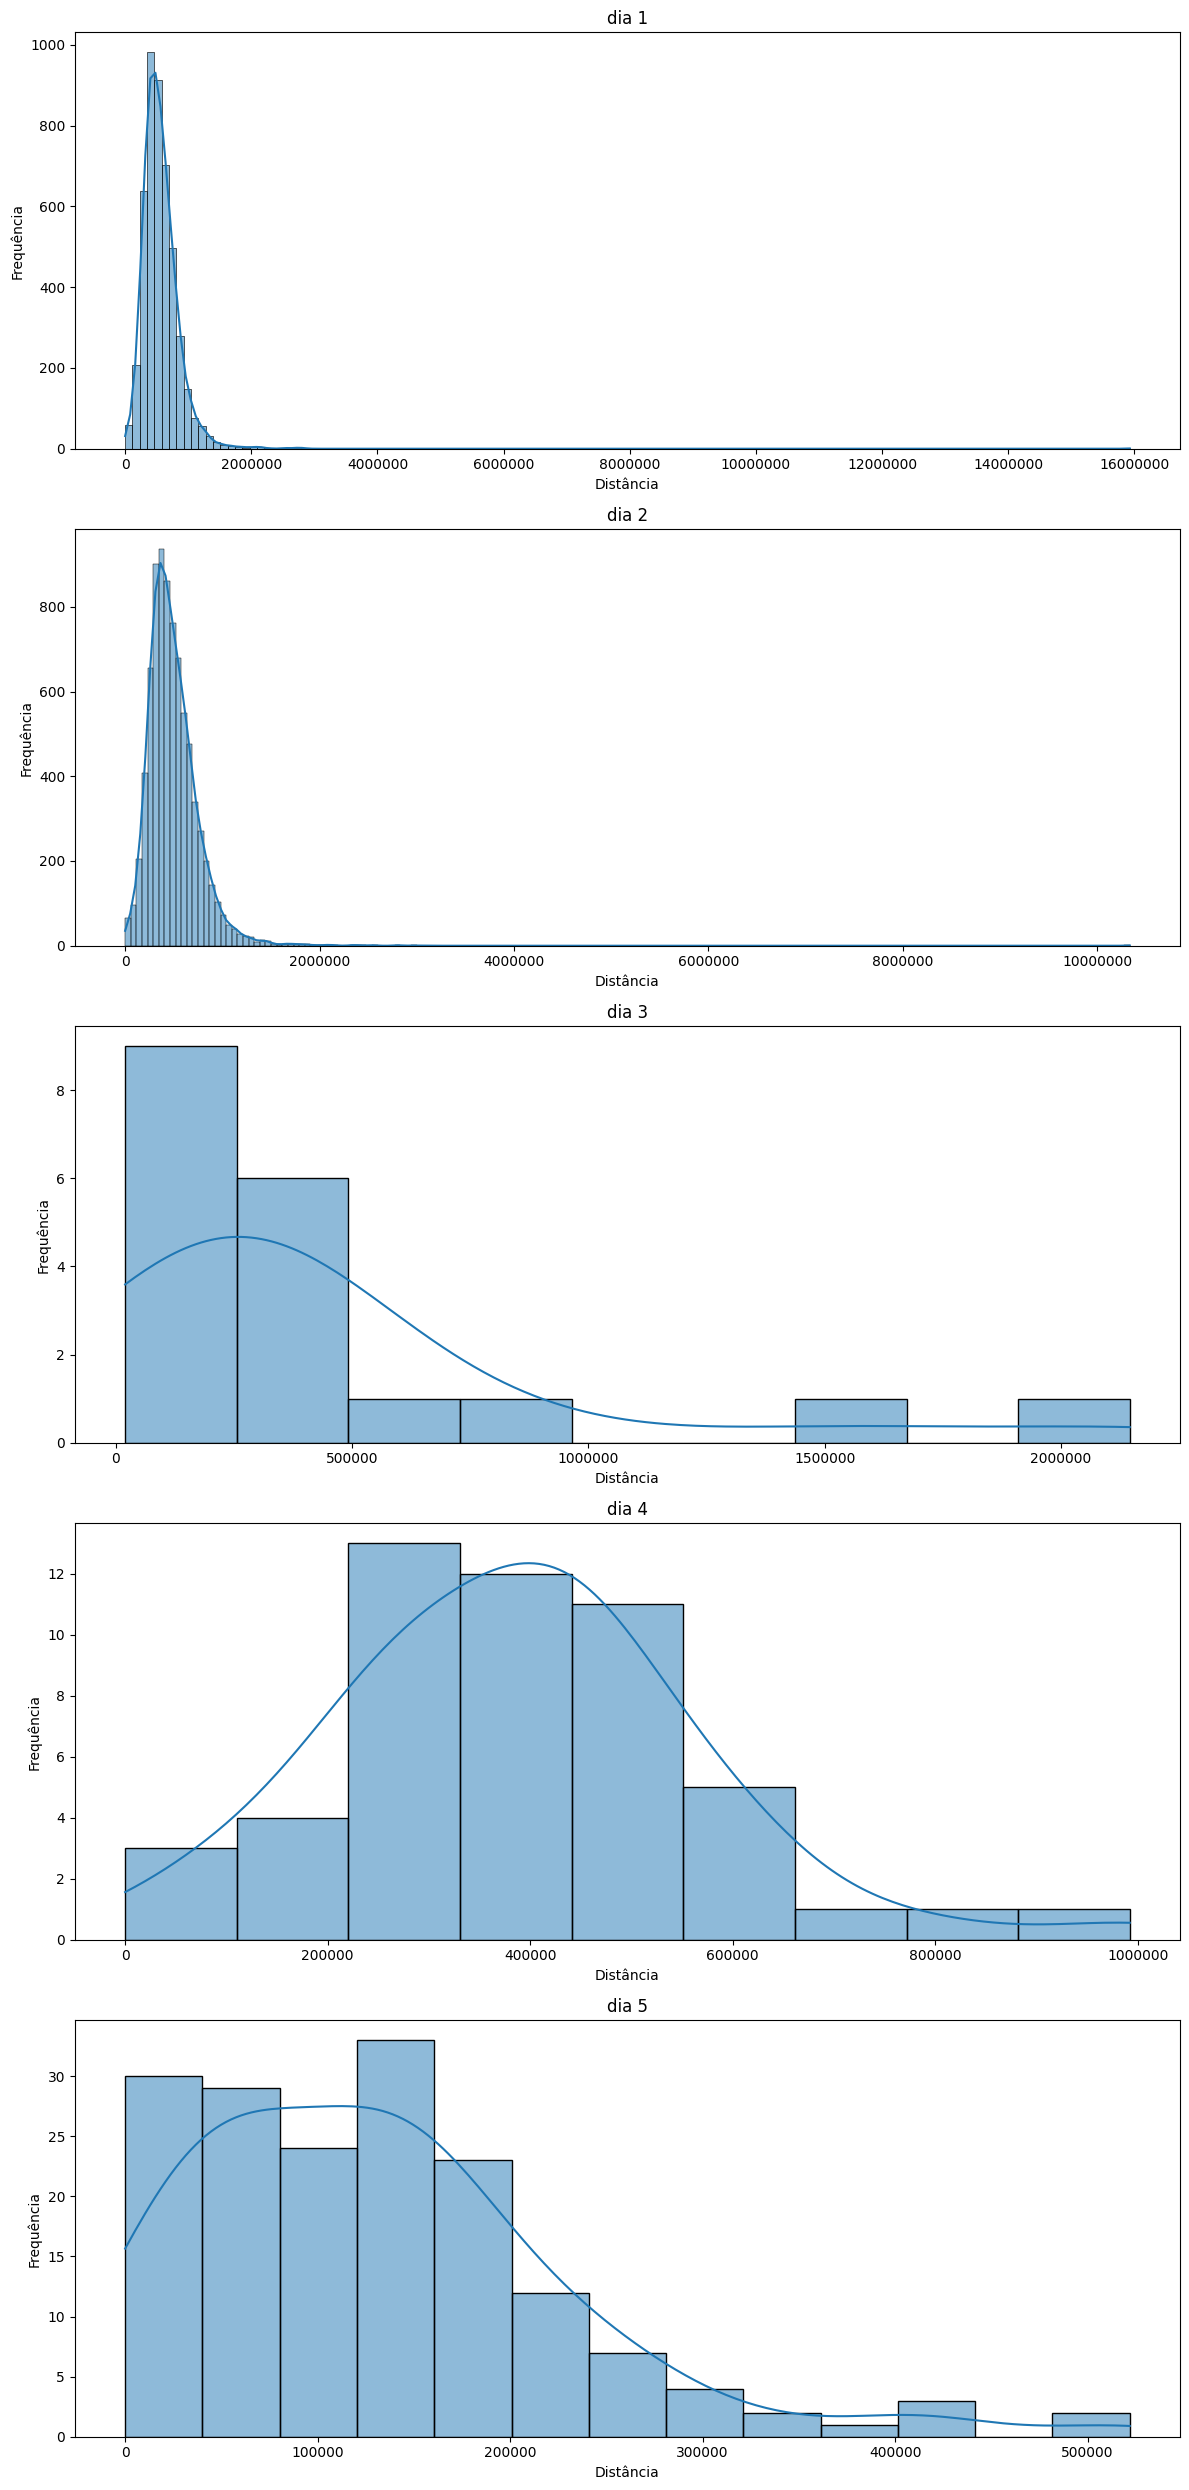

In [7]:
fig, axes = plt.subplots(len(dias_unicos), 1, figsize=(12, 5 * len(dias_unicos)))

if len(dias_unicos) == 1:
    axes = [axes]

for ax, dia in zip(axes, dias_unicos):
    sns.histplot(data=df_posicoes[df_posicoes["dia"] == dia],
                 x="distancia_percorrida", kde=True, ax=ax)
    ax.set_title(f"{dia}")
    ax.set_xlabel("Distância")
    ax.set_ylabel("Frequência")
    ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

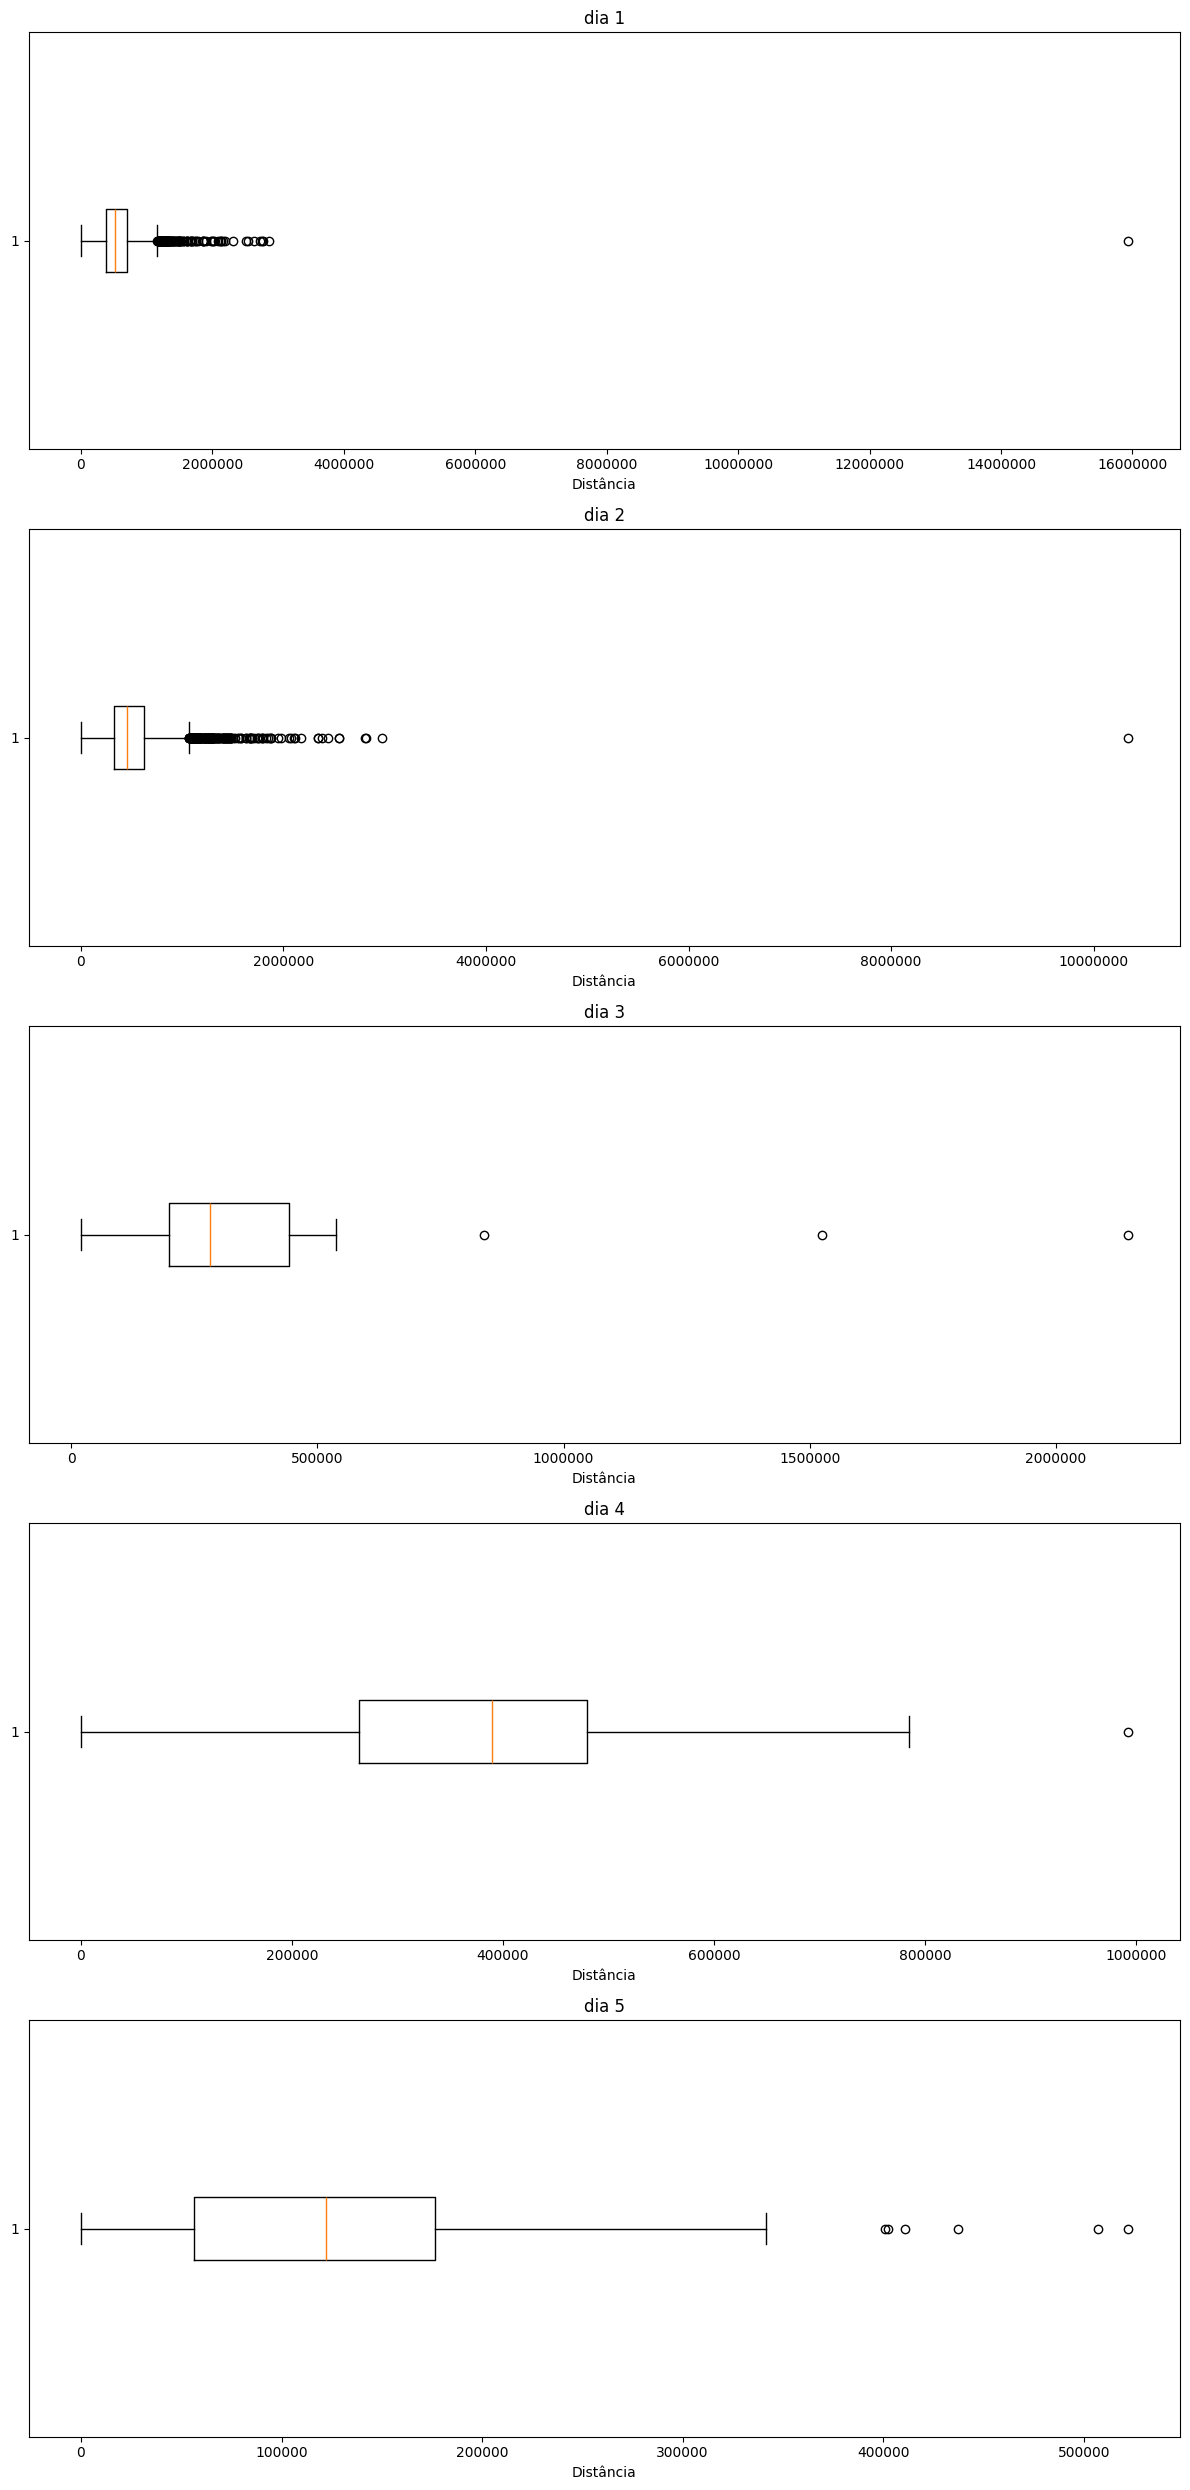

In [8]:
fig, axes = plt.subplots(len(dias_unicos), 1, figsize=(12, 5 * len(dias_unicos)))

if len(dias_unicos) == 1:
    axes = [axes]

for ax, dia in zip(axes, dias_unicos):
    dados_dia = df_posicoes[df_posicoes["dia"] == dia]["distancia_percorrida"]
    ax.boxplot(dados_dia, vert=False)
    ax.set_title(f"{dia}")
    ax.set_xlabel("Distância")
    ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

In [9]:
df_posicoes["velocidade"] = (df_posicoes["distancia_percorrida"] / df_posicoes["segundos_deslocamento"]) * 3.6 # m/s para km/h

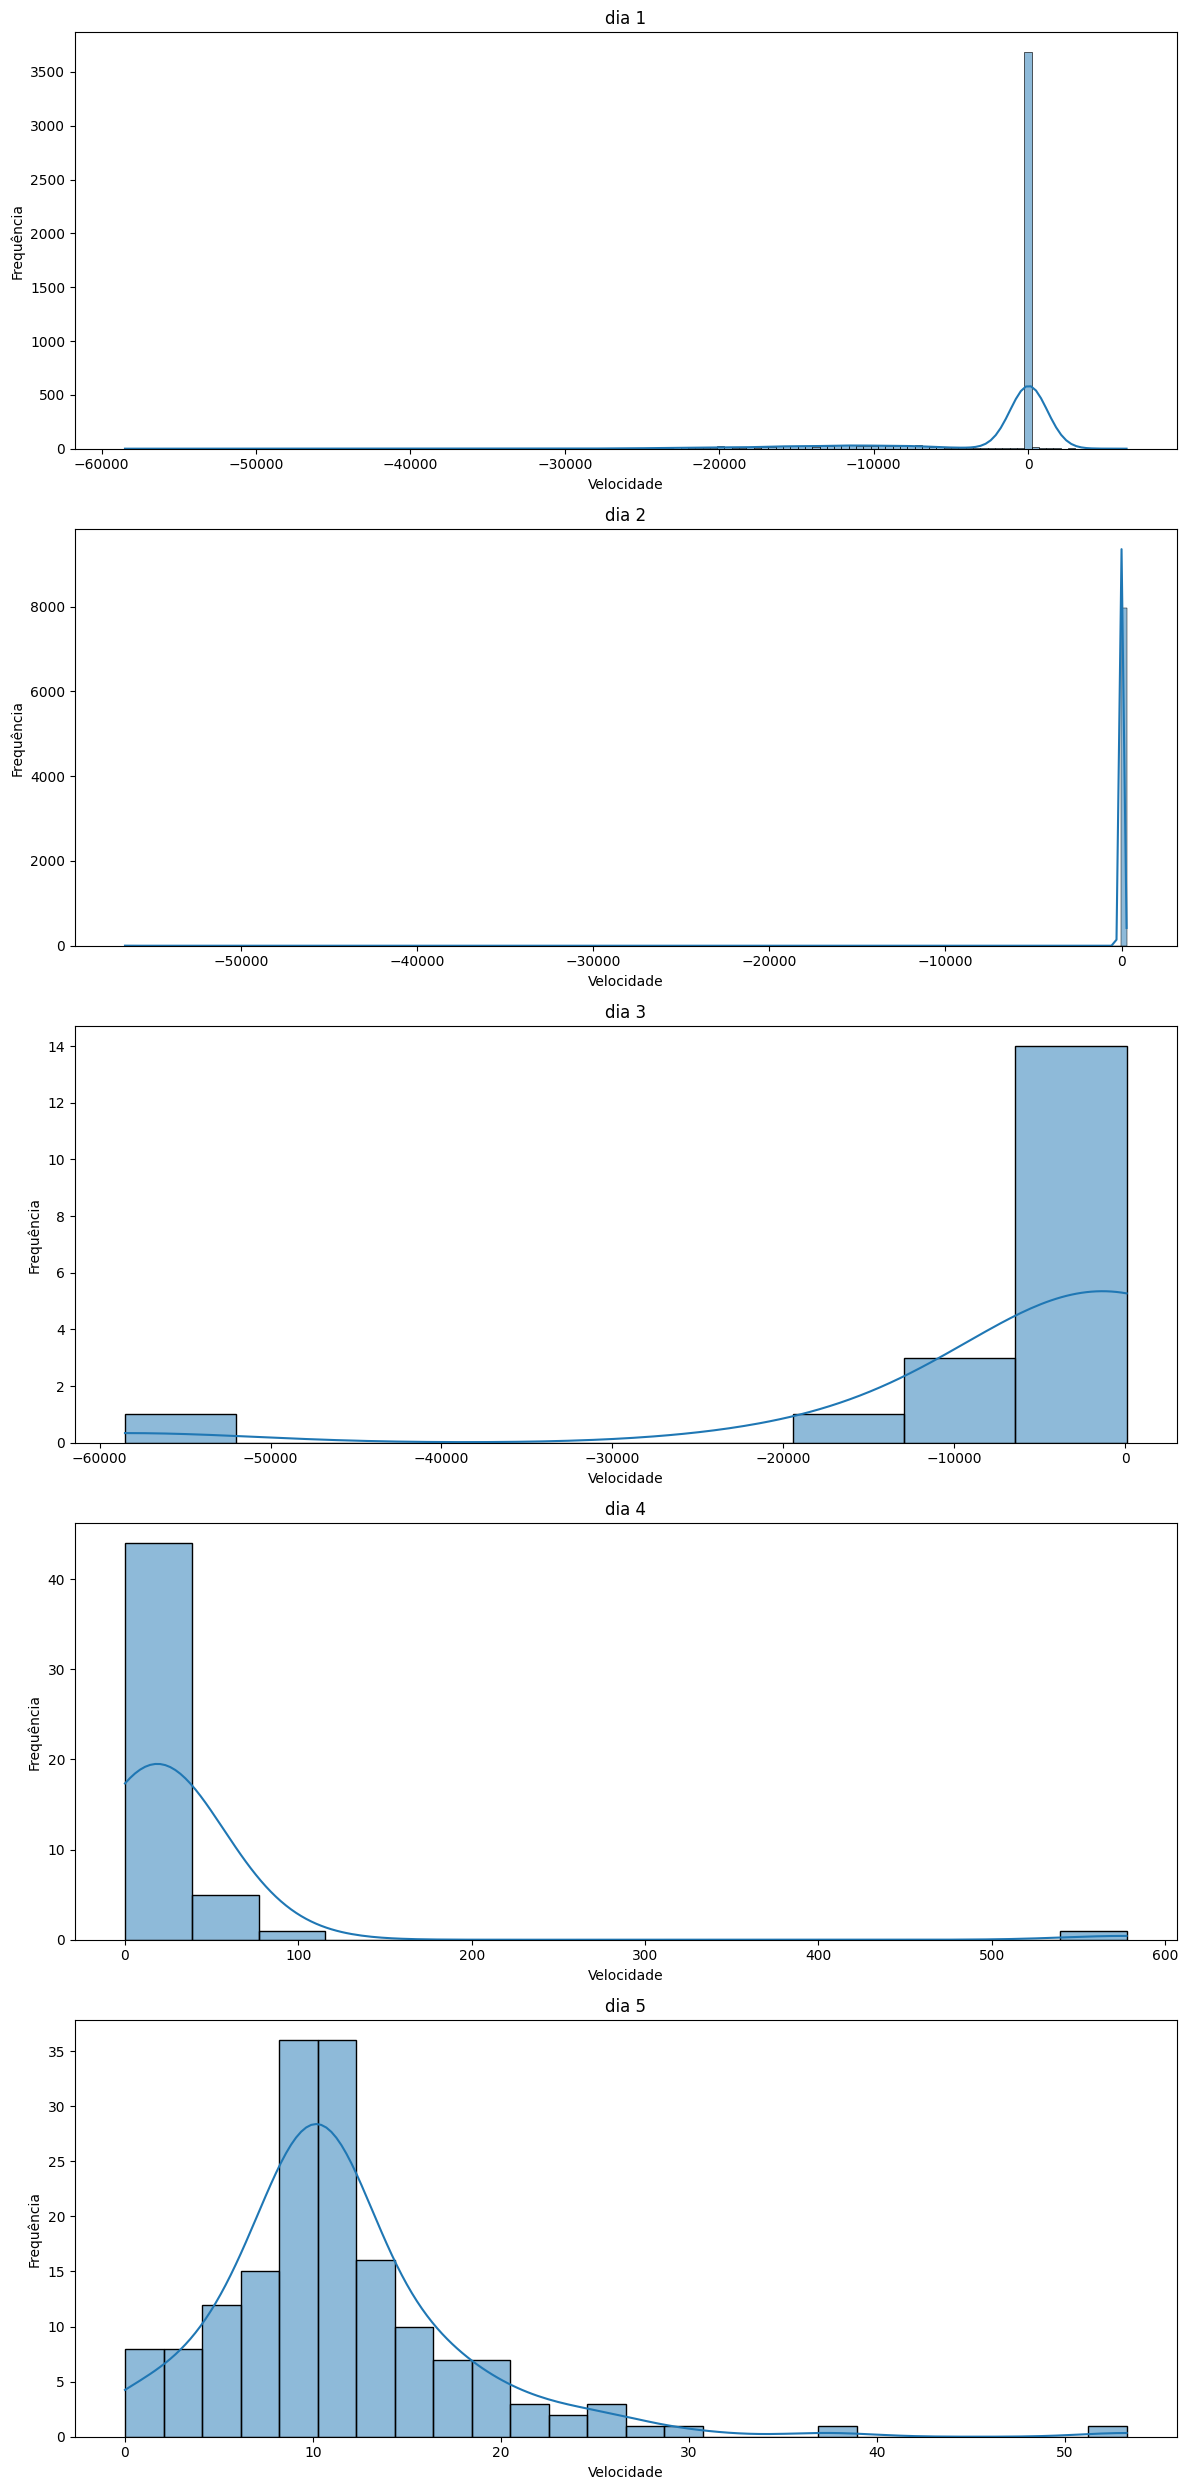

In [10]:
fig, axes = plt.subplots(len(dias_unicos), 1, figsize=(12, 5 * len(dias_unicos)))

if len(dias_unicos) == 1:
    axes = [axes]

for ax, dia in zip(axes, dias_unicos):
    sns.histplot(data=df_posicoes[df_posicoes["dia"] == dia],
                 x="velocidade", kde=True, ax=ax)
    ax.set_title(f"{dia}")
    ax.set_xlabel("Velocidade")
    ax.set_ylabel("Frequência")
    ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()

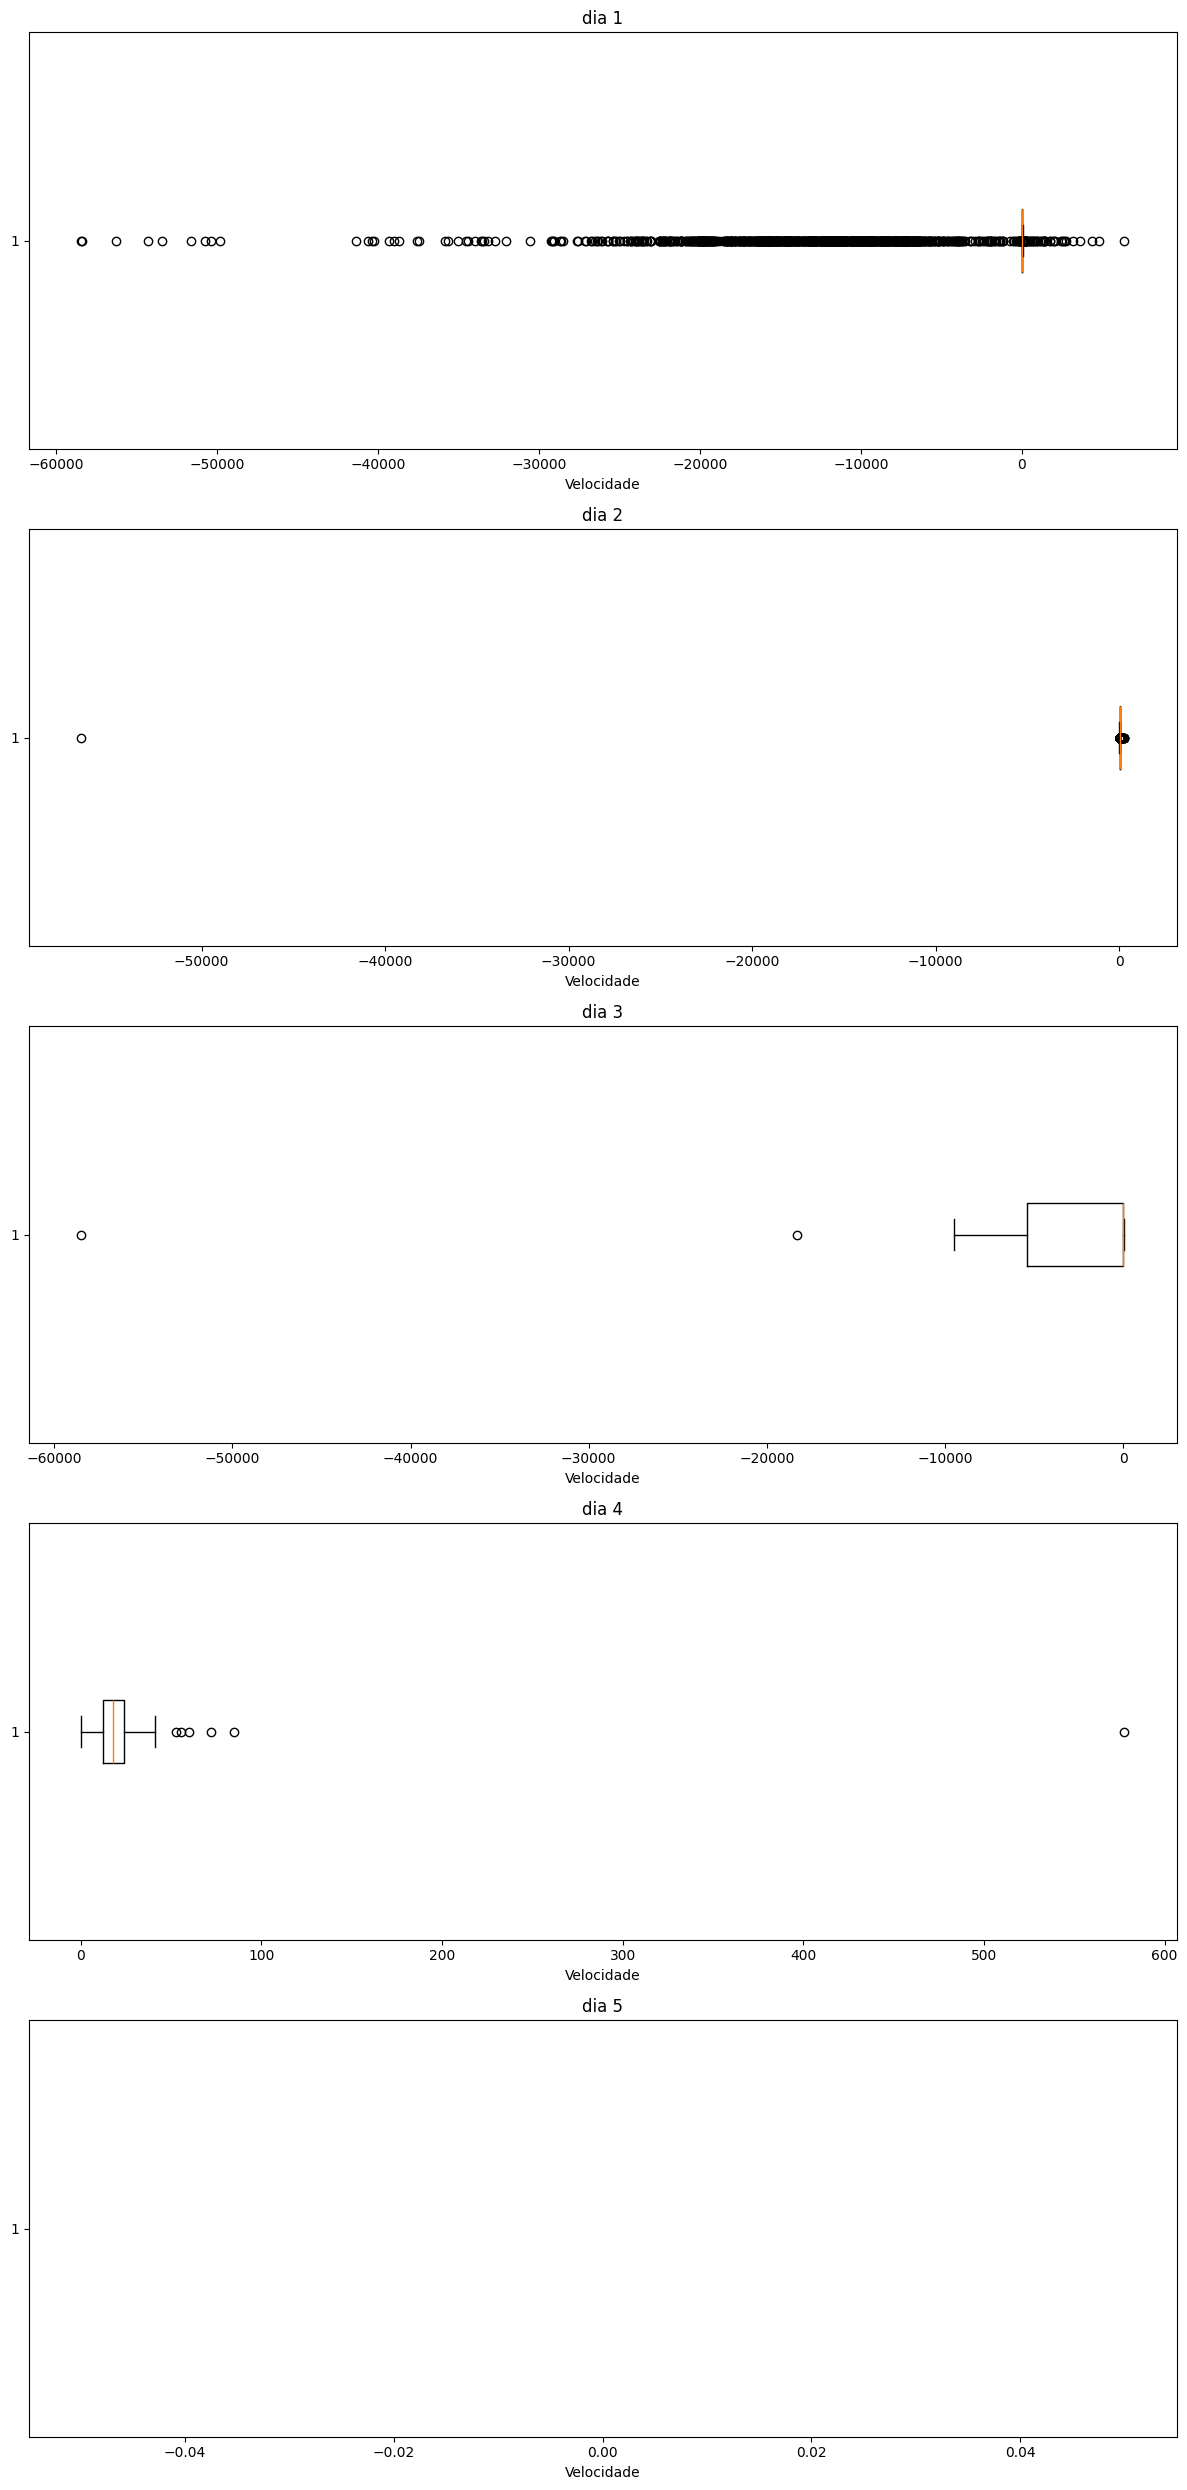

In [11]:
fig, axes = plt.subplots(len(dias_unicos), 1, figsize=(12, 5 * len(dias_unicos)))

if len(dias_unicos) == 1:
    axes = [axes]

for ax, dia in zip(axes, dias_unicos):
    dados_dia = df_posicoes[df_posicoes["dia"] == dia]["velocidade"]
    ax.boxplot(dados_dia, vert=False)
    ax.set_title(f"{dia}")
    ax.set_xlabel("Velocidade")
    ax.ticklabel_format(style='plain', axis='x')

plt.tight_layout()
plt.show()